In [1]:
from tensorly.metrics.regression import RMSE
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from nn_parafac_normalization_comparison import *
#tensor
array=np.random.rand(30, 40, 20)
tensor=tl.tensor(array,dtype='float32')

#parameters
init='svd'
svd='numpy_svd'
rank=10

1. Method from PR
2. Inner loop normalization with last factor normalization after inner loop
3. Normalization at the end
4. 2 and 3 together

In [2]:
#normalized improved nonnegative parafac result
tic = time.time()
tensornorm1, errorsnorm1, weights_iter1 = non_negative_parafac_normalize_1(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm1, factorsnorm1 = tensornorm1
cp_reconstructionnorm1 = tl.cp_to_tensor((weightsnorm1, factorsnorm1))
time_cp1 = time.time() - tic

#normalized improved nonnegative parafac result
tic = time.time()
tensornorm2, errorsnorm2, weights_iter2 = non_negative_parafac_normalize_2(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm2, factorsnorm2 = tensornorm2
cp_reconstructionnorm2 = tl.cp_to_tensor((weightsnorm2, factorsnorm2))
time_cp2 = time.time() - tic

#normalized improved nonnegative parafac result
tic = time.time()
tensornorm3, errorsnorm3, weights_iter3 = non_negative_parafac_normalize_3(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm3, factorsnorm3 = tensornorm3
cp_reconstructionnorm3 = tl.cp_to_tensor((weightsnorm3, factorsnorm3))
time_cp3 = time.time() - tic

#normalized improved nonnegative parafac result
tic = time.time()
tensornorm4, errorsnorm4, weights_iter4 = non_negative_parafac_normalize_4(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm4, factorsnorm4 = tensornorm4
cp_reconstructionnorm4 = tl.cp_to_tensor((weightsnorm4, factorsnorm4))
time_cp4 = time.time() - tic

# Error per iteration 

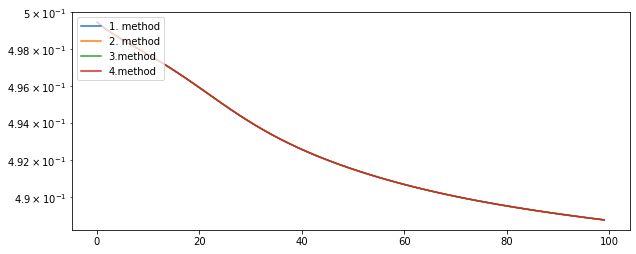

In [3]:
each_iteration(errorsnorm1, errorsnorm2, errorsnorm3, errorsnorm4)

# Weights per iteration 

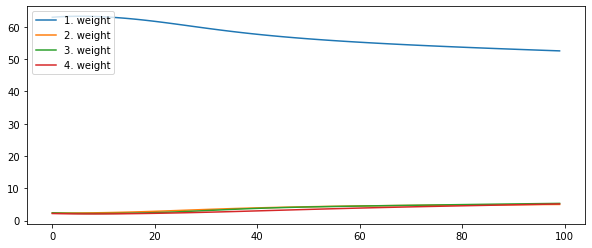

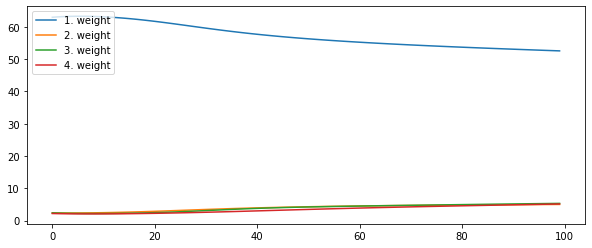

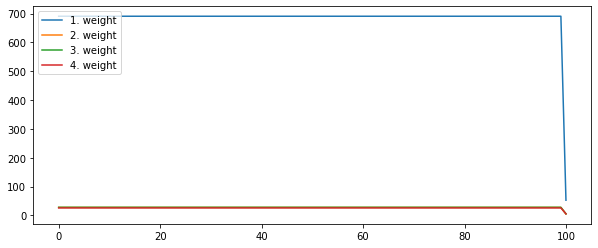

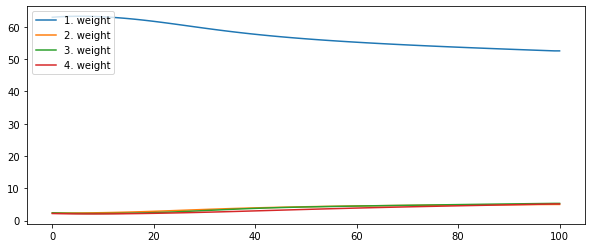

In [4]:
plot_weights(weights_iter1)
plot_weights(weights_iter2)
plot_weights(weights_iter3)
plot_weights(weights_iter4)

# Last weights

In [5]:
print(weightsnorm1[:4])
print(weightsnorm2[:4])
print(weightsnorm3[:4])
print(weightsnorm4[:4])

[52.549816  5.007485  5.333371  5.159512]
[52.54998   5.007487  5.333285  5.159455]
[52.549904   5.0074725  5.333387   5.1597056]
[52.549538   5.0075245  5.333439   5.159304 ]


# Mean of factors

In [6]:
print(tl.mean(factorsnorm1[0]), tl.mean(factorsnorm1[1]), tl.mean(factorsnorm1[2]))
print(tl.mean(factorsnorm2[0]), tl.mean(factorsnorm2[1]), tl.mean(factorsnorm2[2]))
print(tl.mean(factorsnorm3[0]), tl.mean(factorsnorm3[1]), tl.mean(factorsnorm3[2]))
print(tl.mean(factorsnorm4[0]), tl.mean(factorsnorm4[1]), tl.mean(factorsnorm4[2]))

0.14850022 0.12931226 0.18642014
0.14850025 0.12931263 0.1864191
0.14850049 0.12931238 0.18641935
0.14849901 0.12931128 0.18642406


In [7]:
print(RMSE(tensor,cp_reconstructionnorm1))
print(RMSE(tensor,cp_reconstructionnorm2))
print(RMSE(tensor,cp_reconstructionnorm3))
print(RMSE(tensor,cp_reconstructionnorm4))

0.28289017
0.2828902
0.28289017
0.28289002


In [8]:
print(str(time_cp1))
print(str(time_cp2))
print(str(time_cp3))
print(str(time_cp4))

0.37877464294433594
0.2678256034851074
0.22742605209350586
0.26659440994262695
